In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/clean_data.csv")

In [3]:
data_geo = data[["Accident_Index","Longitude","Latitude","Local_Authority_(Highway)"]]

In [4]:
import geopandas
from geodatasets import get_path

In [5]:
gdf_uk = geopandas.read_file("data/uk_lad.geojson")

In [6]:
gdf_uk

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
0,local-authority-district,,8600000,2023-08-02,Hartlepool,10,statistical-geography,E06000001,,geography,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,local-authority-district,,8600001,2023-08-02,Middlesbrough,10,statistical-geography,E06000002,,geography,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,local-authority-district,,8600002,2023-08-02,Redcar and Cleveland,10,statistical-geography,E06000003,,geography,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,local-authority-district,,8600003,2023-08-02,Stockton-on-Tees,10,statistical-geography,E06000004,,geography,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,local-authority-district,,8600004,2023-08-02,Darlington,10,statistical-geography,E06000005,,geography,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...,...,...,...,...,...,...,...,...,...
339,local-authority-district,,8600720,2021-12-11,Gateshead,10,statistical-geography,E08000020,,geography,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,local-authority-district,,8600721,2023-08-02,Cumberland,10,statistical-geography,E06000063,,geography,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,local-authority-district,,8600722,2023-08-02,Westmorland and Furness,10,statistical-geography,E06000064,,geography,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,local-authority-district,,8600723,2023-08-02,North Yorkshire,10,statistical-geography,E06000065,,geography,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


In [7]:
gdf_uk_locals = gdf_uk[["reference", "geometry"]]

gdf_uk_locals

,reference,geometry
0,E06000001,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,E06000002,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,E06000003,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,E06000004,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,E06000005,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...
339,E08000020,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,E06000063,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,E06000064,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,E06000065,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


In [8]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

In [9]:
data = pd.read_csv("data/clean_data.csv")
df = data[["Accident_Index","Longitude","Latitude","Local_Authority_(Highway)"]]

geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]

In [10]:
crs = {"init":"epsg:4326"}
geo_df = gpd.GeoDataFrame(df, #specify our KnC
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Accident_Index,Longitude,Latitude,Local_Authority_(Highway),geometry
0,200501BS00001,-0.191170,51.489096,E09000020,POINT (-0.19117 51.48910)
1,200501BS00002,-0.211708,51.520075,E09000020,POINT (-0.21171 51.52007)
2,200501BS00003,-0.206458,51.525301,E09000020,POINT (-0.20646 51.52530)
3,200501BS00004,-0.173862,51.482442,E09000020,POINT (-0.17386 51.48244)
4,200501BS00005,-0.156618,51.495752,E09000020,POINT (-0.15662 51.49575)


#### MOCK

In [11]:
first = gdf_uk[gdf_uk["reference"] == "E09000020"].index
geo = gdf_uk.iloc[first]["geometry"]
geometry[674].within(geo)

303    True
Name: geometry, dtype: bool

### Show maps with input

In [13]:
district_names = gdf_uk["name"]

In [17]:
input_district = input()
district = gdf_uk[gdf_uk["name"] == input_district]
code = district["reference"]

In [18]:
district = data_geo[data_geo["Local_Authority_(Highway)"] == code.values[0]]
district

,Accident_Index,Longitude,Latitude,Local_Authority_(Highway)
69892,200514B024805,-1.569295,53.481715,E08000019
70953,200514C112905,-1.409943,53.421618,E08000019
71169,200514C169205,-1.409791,53.421798,E08000019
71212,200514C178905,-1.389972,53.408125,E08000019
71362,200514D000305,-1.467799,53.367687,E08000019
...,...,...,...,...
1378785,201414K335414,-1.452217,53.407330,E08000019
1378786,201414K335514,-1.402391,53.414058,E08000019
1378787,201414K335614,-1.419865,53.396957,E08000019
1378788,201414K335914,-1.516189,53.328154,E08000019


In [19]:
district_locs = district[["Latitude","Longitude"]]
district_locs

,Latitude,Longitude
69892,53.481715,-1.569295
70953,53.421618,-1.409943
71169,53.421798,-1.409791
71212,53.408125,-1.389972
71362,53.367687,-1.467799
...,...,...
1378785,53.407330,-1.452217
1378786,53.414058,-1.402391
1378787,53.396957,-1.419865
1378788,53.328154,-1.516189


In [21]:
import folium
import pandas as pd
import webbrowser
new = 2
# Create a map centered around an initial point
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Add a marker for each data point (you may want to subsample or aggregate your data)
for index, row in district_locs.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,  # Adjust the radius as needed
        fill=True,  # Fill the circle
        color="blue",  # Circle color
        fill_color="blue",  # Fill color
    ).add_to(m)

url = str(code.values[0])+ "_map.html"
webbrowser.open(url,new=new)

True

In [22]:
# Save
m.save(str(code.values[0])+ "_map.html")

### Kensington_and_Chelsea District (E09000020) Accidents in Map

In [23]:
Kensington_and_Chelsea = data_geo[data_geo["Local_Authority_(Highway)"] == code.values[0]]

In [24]:
KnC_locs = Kensington_and_Chelsea[["Latitude","Longitude"]]

In [25]:
# KnC_locs.to_csv(r"data\KnC_locs.csv")

In [81]:
import folium
import pandas as pd

# Create a map centered around an initial point
m = folium.Map(location=[KnC_locs["Latitude"].mean(), KnC_locs["Longitude"].mean()], zoom_start=15, prefer_canvas=True)

# Add a marker for each data point (you may want to subsample or aggregate your data)
for index, row in KnC_locs.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,  # Adjust the radius as needed
        fill=True,  # Fill the circle
        color="blue",  # Circle color
        fill_color="blue",  # Fill color
    ).add_to(m)

url = "E09000020_map.html"
webbrowser.open(url,new=new)

True

In [28]:
# Save
m.save("E09000020_map.html")

### Map Visualizations

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import hdbscan
import folium
import re
cols = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4",
        "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", 
        "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", 
        "#000075", "#808080"]*10
sns.set(style="white")

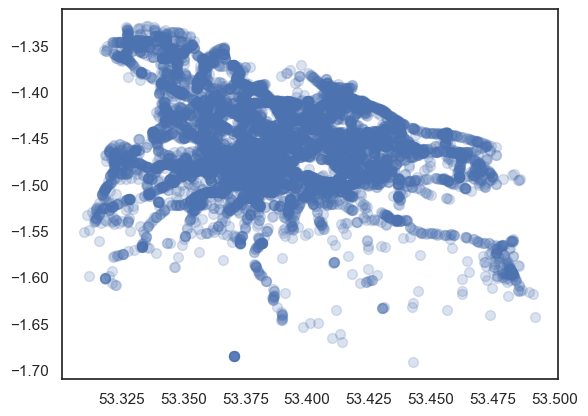

In [62]:
X = np.array(KnC_locs[["Latitude", "Longitude"]], dtype="float64")
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [80]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Create a dataframe from your data
KnC = KnC_locs

# Initialize a map centered around the first data point
map_center = [KnC["Latitude"].iloc[0], KnC["Longitude"].iloc[0]]
m = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster layer for the clustered points
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point with cluster labels
for _, row in KnC.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]], icon=None).add_to(marker_cluster)

url = "KnC.html"
webbrowser.open(url,new=new)

True

In [64]:
# Save the map to an HTML file
m.save("KnC.html")

### Cluster with DBSCAN

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import random

In [66]:
X_train = district_locs

In [67]:
clustering = DBSCAN(eps=0.0006, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,"Cluster"] = clustering.labels_ 

In [68]:
data2 = DBSCAN_dataset

In [82]:
# Create a map centered around a specific location (e.g., San Francisco)
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Define colors for clusters
num_clusters = 120
# Generate a list of distinct colors using a colormap
colors = cm.viridis(np.linspace(0, 1, num_clusters))

# Convert the colors to hexadecimal format
cluster_colors = {i + 1: "#{:02x}{:02x}{:02x}".format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255)) for i, c in enumerate(colors)}

# Add markers to the map with cluster-based colors
for index, row in data2.iterrows():
    cluster = row["Cluster"]
    color = cluster_colors.get(cluster, "gray")
    folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                        color=color,
                        fill=True,
                        fill_color=color,
                        radius=3).add_to(m)

url = str(code.values[0])+ "_kmeansclustermap.html"
webbrowser.open(url,new=new)

True

In [70]:
# save
m.save(str(code.values[0])+ "_kmeansclustermap.html")

### Cluster with K-Means

In [71]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
import math 

In [72]:
# Load your data into a pandas dataframe
data1 = district_locs
# Extract the latitude and longitude columns
X = data1[["Latitude", "Longitude"]]

In [73]:
# Specify the number of clusters (k)
k = round(math.sqrt(len(X)/2))  # You can adjust this based on your requirements

In [74]:
# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=79, random_state=42)

In [75]:
# Add the cluster labels to your dataframe
data1["Cluster"] = kmeans.labels_

C:\Users\kdrer\AppData\Local\Temp\ipykernel_1856\3088334225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Cluster"] = kmeans.labels_


In [78]:
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Create points with different random colors for each cluster
cluster_colors = {}
for _, row in data1.iterrows():
    cluster_label = row["Cluster"]
    if cluster_label not in cluster_colors:
        cluster_colors[cluster_label] = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color = cluster_colors[cluster_label]
    folium.Circle(location=[row["Latitude"], row["Longitude"]], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6, popup=f"Cluster {cluster_label}").add_to(m)

url = str(code.values[0])+ "_kmeansclustermap.html"
# webbrowser.open(url,new=new)
webbrowser.open(url,new=new)

True

In [77]:
# Save the map to an HTML file
m.save(str(code.values[0])+ "_kmeansclustermap.html")